Análise exploratória dos dados

In [7]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Database/1. Registros abertos e fechados _ Todas as mudanças.csv', sep=';')

In [9]:
cc_df = df.copy()  # Create a copy of the DataFrame for further processing

In [10]:
cc_df = df.copy()  # Create a copy of the DataFrame for further processing
cc_df = cc_df.fillna(0)  # Replace all NaN or null values with 0

In [11]:
date_columns = [
    "Planned Completion",
    "Planned Verification",
    "Planned Regulatory Closure Date",
    "Closed",
    "Actual Regulatory Approval Date",
    "Quality Verification Completion Date",
    "Approval",
    "Created"
]

for col in date_columns:
    if col in cc_df.columns:
        # Substitui valores 0 por NaN antes de converter para datetime
        cc_df[col] = cc_df[col].replace(0, pd.NA)
        cc_df[col] = pd.to_datetime(cc_df[col], errors='coerce', dayfirst=True)

C:\Users\Anderson Luis\AppData\Local\Temp\ipykernel_26296\271340558.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cc_df[col] = pd.to_datetime(cc_df[col], errors='coerce', dayfirst=True)
C:\Users\Anderson Luis\AppData\Local\Temp\ipykernel_26296\271340558.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cc_df[col] = pd.to_datetime(cc_df[col], errors='coerce', dayfirst=True)
C:\Users\Anderson Luis\AppData\Local\Temp\ipykernel_26296\271340558.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cc_df[col] = pd.to_datetime(cc_df[col], errors='coerce', dayfirst=True)
C

In [12]:
task_df = pd.read_csv('Database/1. Registros abertos e fechados _ Lista de tarefas TC.csv', sep=';')

In [13]:
task_counts = task_df['Change Number'].value_counts()
cc_df['total de tarefas'] = cc_df['Número'].map(task_counts).fillna(0).astype(int)

In [14]:
# Conta o número de tarefas "Pre Implemantation" para cada "Change Number"
pre_impl_counts = task_df[task_df['Task Type'] == 'Pre-Implementation']['Change Number'].value_counts()

# Cria a nova coluna em cc_df com a contagem correspondente
cc_df['pre_implementation_count'] = cc_df['Número'].map(pre_impl_counts).fillna(0).astype(int)

In [15]:
# Conta o número de tarefas "Implemantation" para cada "Change Number"
impl_counts = task_df[task_df['Task Type'] == 'Implementation']['Change Number'].value_counts()

# Cria a nova coluna em cc_df com a contagem correspondente
cc_df['implementation_count'] = cc_df['Número'].map(impl_counts).fillna(0).astype(int)

In [16]:
# Conta o número de tarefas "Post Implemantation" para cada "Change Number"
impl_counts = task_df[task_df['Task Type'] == 'Post-Implementation']['Change Number'].value_counts()

# Cria a nova coluna em cc_df com a contagem correspondente
cc_df['post_implementation_count'] = cc_df['Número'].map(impl_counts).fillna(0).astype(int)

In [17]:
# Faz o merge dos dataframes cc_df e task_df usando "Número" e "Change Number"
merged = pd.merge(
    cc_df,
    task_df[['Change Number', 'Data de vencimento da tarefa']],
    left_on='Número',
    right_on='Change Number',
    how='left'
)

# Converte as datas para datetime, se necessário
merged['Data de vencimento da tarefa'] = pd.to_datetime(merged['Data de vencimento da tarefa'], errors='coerce', dayfirst=True)
merged['Created'] = pd.to_datetime(merged['Created'], errors='coerce', dayfirst=True)

# Calcula a diferença em dias entre "Data de vencimento da tarefa" e "Created"
merged['tempo_tarefa'] = (merged['Data de vencimento da tarefa'] - merged['Created']).dt.days

# Calcula o tempo médio de tarefas para cada "Número"
tempo_medio = merged.groupby('Número')['tempo_tarefa'].mean()
#desvio
desvio = merged.groupby('Número')['tempo_tarefa'].std()
# Adiciona a coluna no cc_df
cc_df['tempo_medio_tarefas'] = cc_df['Número'].map(tempo_medio)
cc_df['desviopad_tarefas'] = cc_df['Número'].map(desvio)

C:\Users\Anderson Luis\AppData\Local\Temp\ipykernel_26296\4008037657.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged['Data de vencimento da tarefa'] = pd.to_datetime(merged['Data de vencimento da tarefa'], errors='coerce', dayfirst=True)


In [18]:
cc_df['tempo_medio_tarefas'].isna().sum()

np.int64(840)

In [19]:
cc_df['tempo_medio_tarefas'] = cc_df['tempo_medio_tarefas'].fillna(0)
cc_df['desviopad_tarefas'] = cc_df['desviopad_tarefas'].fillna(0)

In [20]:
cc_df.head()  # Display the first few rows of the copied DataFrame

,Local,Número,Título,Fase,Tier,Change Manager,Iniciador,Representante da qualidade,Prod Impact,Reg. Impact,...,Is there artwork impact?,Actual Regulatory Approval Date,Quality Verification Completion Date,Regulatory Rep,total de tarefas,pre_implementation_count,implementation_count,post_implementation_count,tempo_medio_tarefas,desviopad_tarefas
0,Cruzeiro,CR063038,0,Cancelled,Tier 1,0,Gustavo Ferraz Santos,0,0,0,...,0,NaT,NaT,0,0,0,0,0,0.0,0.0
1,Cruzeiro,CR063035,Atualização de procedimentos relacionados a am...,Quality Confirmation,Tier 1,0,Gustavo Ferraz Santos,Anderson da Silva,0,0,...,0,NaT,NaT,0,3,0,3,0,0.0,0.0
2,Cruzeiro,CR063002,Atualização das artes e especificações do prod...,Initiate,Tier 1,0,Vilmar Alves,Anderson da Silva,0,0,...,0,NaT,NaT,0,3,0,3,0,135.0,0.0
3,Cruzeiro,CR062841,Atualização da especificação de aspecto do pro...,Initiate,0,Juliana Silva,Juliana Silva,Anderson da Silva,No,No,...,0,NaT,NaT,Jessica Isaac,0,0,0,0,0.0,0.0
4,Cruzeiro,CR062778,Remoção e descarte de gerador de energia (GERA...,Implementation,Tier 1,0,Leonardo Guedes,Anderson da Silva,0,0,...,0,NaT,NaT,0,6,0,6,0,0.0,0.0


In [21]:
cc_df.info()  # Display the first few rows of the copied DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Local                                 1167 non-null   object        
 1   Número                                1167 non-null   object        
 2   Título                                1167 non-null   object        
 3   Fase                                  1167 non-null   object        
 4   Tier                                  1167 non-null   object        
 5   Change Manager                        1167 non-null   object        
 6   Iniciador                             1167 non-null   object        
 7   Representante da qualidade            1167 non-null   object        
 8   Prod Impact                           1167 non-null   object        
 9   Reg. Impact                           1167 non-null   object        
 10  

In [22]:
# Substituindo datas vazias por 31/12/2025
for col in [
    "Planned Completion",
    "Planned Verification",
    "Planned Regulatory Closure Date",
    "Closed",
    "Actual Regulatory Approval Date",

    "Quality Verification Completion Date",
    "Approval",
    "Created"
]:
    if col in cc_df.columns:
        cc_df[col] = cc_df[col].fillna(pd.Timestamp("2025-12-31"))

In [23]:
# Se 'Tier' for 0, substitui pelo texto "Simple"
if 'Tier' in cc_df.columns:
    cc_df.loc[cc_df['Tier'] == 0, 'Tier'] = "Simple"

In [24]:
cc_df = cc_df[~cc_df['Fase'].isin(['Cancelled', 'Initiate'])]

In [25]:
cc_df = cc_df.drop([
    'Local',
    'Change Manager',
    'Iniciador',
    'Representante da qualidade',
    'Planned Regulatory Closure Date',
    'Closed',
    'Change Mgr Dept',
    'Site Review Council',
    'Actual Regulatory Approval Date',
    'Quality Verification Completion Date',
    'Regulatory Rep'
], axis=1, errors='ignore')

In [26]:
# Substitui valores 0 por "No" nas colunas 'Prod Impact' e 'Reg. Impact'
for col in ['Prod Impact', 'Reg. Impact', 'Is there artwork impact?']:
    if col in cc_df.columns:
        cc_df.loc[cc_df[col] == 0, col] = "No"

In [27]:
# Substitui valores 0 por "Business/process improvement or change" na coluna Change Driver
for col in ['Change Driver']:
    if col in cc_df.columns:
        cc_df.loc[cc_df[col] == 0, col] = "Business/process improvement or change"

In [28]:
if 'Planned Completion' in cc_df.columns and 'Created' in cc_df.columns:
    cc_df['Total dias Planejado'] = (cc_df['Planned Completion'] - cc_df['Created']).dt.days

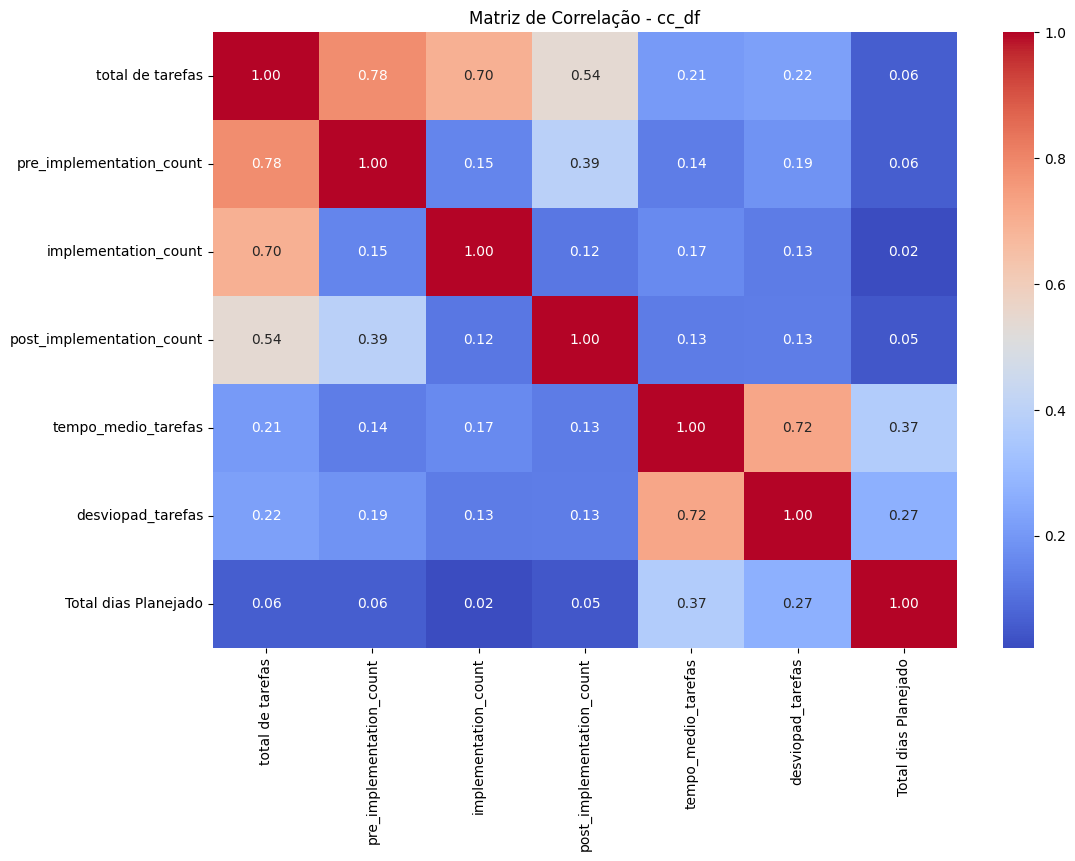

In [29]:
plt.figure(figsize=(12, 8))
corr = cc_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - cc_df')
plt.show()

In [30]:
task_df.head()

,Task Number,Task Title,Task Type,Task Phase,Atribuído a,Gap,Departamento,Batch Rel Task,Data de vencimento da tarefa,Data de conclusão,Change Number,Change Title,Local,Change Phase,Approval Date,Parent Author,Change Manager Name,Created Date,Quality Rep
0,TC264564,Avaliar se as atividades de EHS foram devidame...,Implementation,Pending,Rafael Brandão Nascimento,No,GTO-PTS,No,"out 24, 2025",NaN,CR063105,Aprovação do Éster PAG 40EO - Emulsogen EL/Alk...,Cruzeiro,Initiate,NaN,Rafael Brandão Nascimento,NaN,"jul 21, 2025",Anderson da Silva
1,TC264563,"Aprovar material conforme C-GQ-PMQF-001, criar...",Implementation,Pending,Sara Souto,No,Packaging,No,"set 26, 2025",NaN,CR063105,Aprovação do Éster PAG 40EO - Emulsogen EL/Alk...,Cruzeiro,Initiate,NaN,Rafael Brandão Nascimento,NaN,"jul 21, 2025",Anderson da Silva
2,TC264562,Avaliar o cadastro do Éster PAG 40EO - Emulsog...,Implementation,Pending,Williseane Guimaraes Portugal,No,SHE,No,"set 26, 2025",NaN,CR063105,Aprovação do Éster PAG 40EO - Emulsogen EL/Alk...,Cruzeiro,Initiate,NaN,Rafael Brandão Nascimento,NaN,"jul 21, 2025",Anderson da Silva
3,TC264561,Atualizar o inventário de produtos químicos do...,Implementation,Pending,Eduardo Barros,No,Manufacturing,No,"set 26, 2025",NaN,CR063105,Aprovação do Éster PAG 40EO - Emulsogen EL/Alk...,Cruzeiro,Initiate,NaN,Rafael Brandão Nascimento,NaN,"jul 21, 2025",Anderson da Silva
4,TC264498,Verificação de efetividade - Evidenciar a libe...,Implementation,Assigned,Eduardo Barros,No,Manufacturing,No,"out 29, 2025",NaN,CR063094,Atualização na descrição da etapa adição da so...,Cruzeiro,Implementation,"jul 21, 2025",Eduardo Barros,NaN,"jul 21, 2025",Anderson da Silva


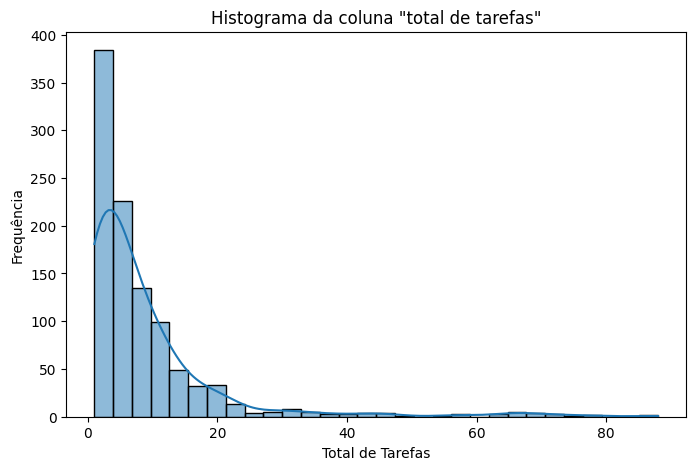

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(cc_df['total de tarefas'], bins=30, kde=True)
plt.xlabel('Total de Tarefas')
plt.ylabel('Frequência')
plt.title('Histograma da coluna "total de tarefas"')
plt.show()

In [32]:
# Divide os dados em 3 classes ("Low", "Medium", "High") usando os quartis da coluna "total de tarefas"
q1 = cc_df['total de tarefas'].quantile(1/2)
def classify_quartis(x):
    if x <= q1:
        return "Low"
    else:
        return "High"

cc_df['Target'] = cc_df['total de tarefas'].apply(classify_quartis)

In [33]:
q1

np.float64(5.0)

In [34]:
display(cc_df['Target'].value_counts())

Target
Low     542
High    490
Name: count, dtype: int64

In [35]:
features = cc_df.drop(['Target','total de tarefas', 'Título', 'Número', "implementation_count"], axis=1)
target = cc_df['Target']

date_columns = [
    "Planned Completion",
    "Planned Verification",
    "Planned Regulatory Closure Date",
    "Closed",
    "Actual Regulatory Approval Date",
    "Quality Verification Completion Date",
    "Approval",
    "Created"
]
features = features.drop(columns=[col for col in date_columns if col in features.columns])

features = pd.get_dummies(features)

display(features.head())

,pre_implementation_count,post_implementation_count,tempo_medio_tarefas,desviopad_tarefas,Total dias Planejado,Fase_Awaiting Regulatory,Fase_Closed,Fase_Define Effectiveness Check,Fase_Implementation,Fase_Post Implementation,...,Prod Impact_Yes,Reg. Impact_No,Reg. Impact_Yes,Change Driver_Business/process improvement or change,Change Driver_Compendial,Change Driver_Quality/Compliance,"Change Driver_Routine (Master Data, Like-for-Like, etc)",Change Driver_Safety and Environmental,Is there artwork impact?_No,Is there artwork impact?_Yes
1,0,0,0.000000,0.000000,167,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
4,0,0,0.000000,0.000000,176,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
5,0,0,0.000000,0.000000,180,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
6,5,1,5.857143,5.113009,17,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
8,0,0,155.000000,0.000000,188,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False


In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (825, 27)
Shape of X_test: (207, 27)
Shape of y_train: (825,)
Shape of y_test: (207,)


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Inicializa o modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Treina o modelo
model.fit(X_train, y_train)

# Faz previsões
y_pred = model.predict(X_test)

In [38]:
# Train the model using the training data
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the first few predictions
display(y_pred[:5])

array(['Low', 'Low', 'High', 'High', 'High'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of the Decision Tree Model:", accuracy)

Accuracy of the Decision Tree Model: 0.8405797101449275


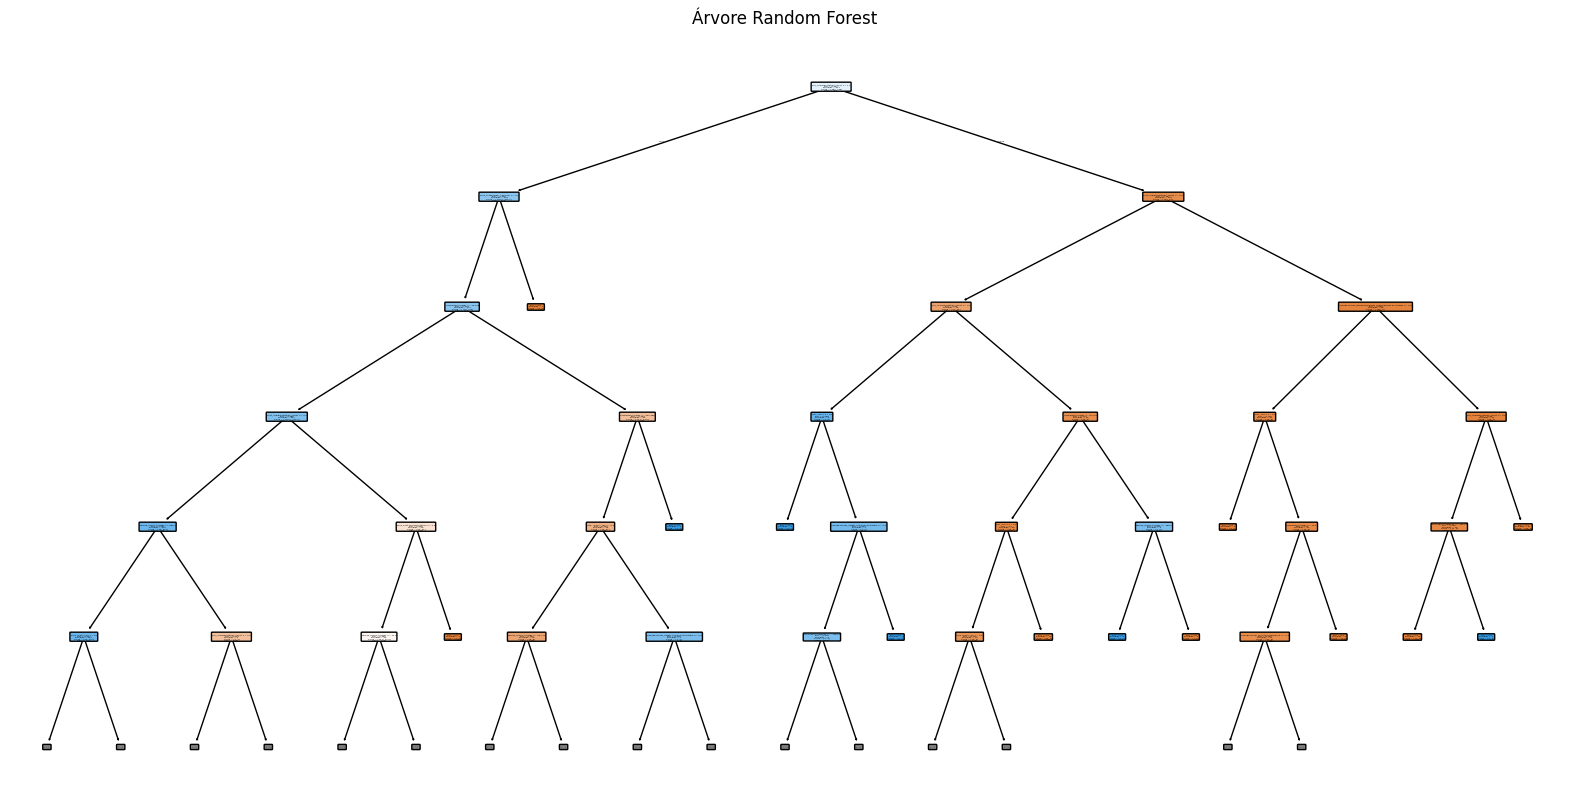

In [41]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model.estimators_[0],  # primeira árvore da floresta
    feature_names=features.columns.tolist(),
    class_names=model.classes_,
    filled=True,
    rounded=True,
    max_depth=5
)
plt.title('Árvore Random Forest')
plt.show()

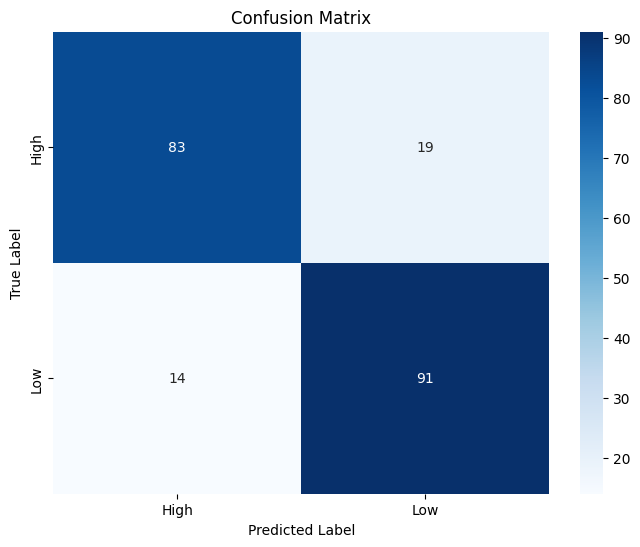

In [42]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class names
class_names = model.classes_

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.metrics import classification_report

# Imprime o classification report do modelo
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        High       0.86      0.81      0.83       102
         Low       0.83      0.87      0.85       105

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



C:\Users\Anderson Luis\AppData\Local\Temp\ipykernel_26296\2343238412.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_names, palette="viridis")


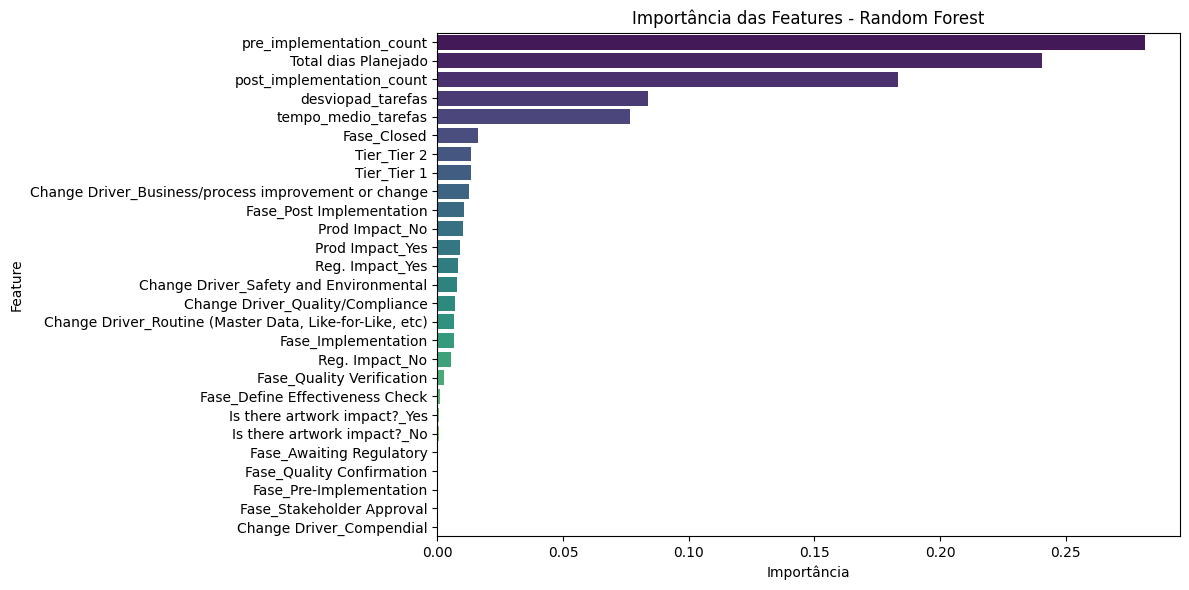

In [44]:
# Plotando as importâncias das features do modelo Random Forest
importances = model.feature_importances_
feature_names = X_train.columns

# Ordena as importâncias e nomes das features
indices = importances.argsort()[::-1]
sorted_importances = importances[indices]
sorted_names = feature_names[indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances, y=sorted_names, palette="viridis")
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
pip install joblib

In [46]:
import joblib

# Salva o modelo treinado em um arquivo
joblib.dump(model, 'random_forest_model.joblib')

print('Modelo salvo como random_forest_model.joblib')

Modelo salvo como random_forest_model.joblib
